In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# building an image classifier using the sequential API

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [4]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/home/tumuruu/Desktop/ml/vs_code/tensorflow/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
W0000 00:00:1761280838.613599   16085 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7567 - loss: 0.7368 - val_accuracy: 0.8230 - val_loss: 0.5160
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8292 - loss: 0.4905 - val_accuracy: 0.8356 - val_loss: 0.4576
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8442 - loss: 0.4439 - val_accuracy: 0.8428 - val_loss: 0.4336
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8531 - loss: 0.4160 - val_accuracy: 0.8510 - val_loss: 0.4178
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8596 - loss: 0.3956 - val_accuracy: 0.8542 - val_loss: 0.4058
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8653 - loss: 0.3795 - val_accuracy: 0.8580 - val_loss: 0.3958
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8700 - loss: 0.3661 - val_accuracy: 0.8592 - val_loss: 0.3889
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8737 - loss: 0.3546 - 

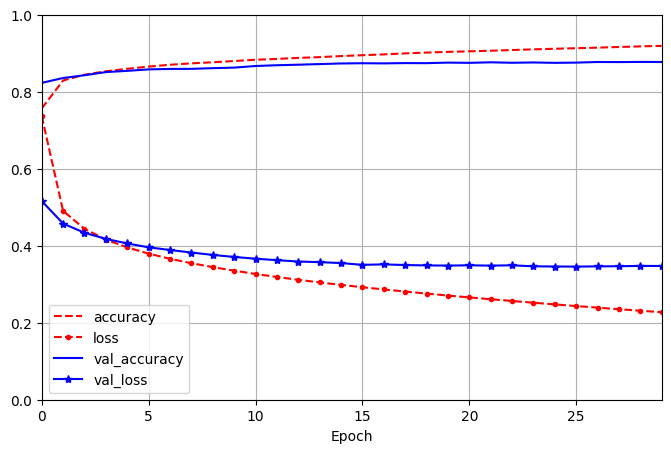

In [9]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [10]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3619


[0.3619022071361542, 0.8759999871253967]

In [11]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[[0.   0.   0.   0.   0.   0.15 0.   0.02 0.   0.82]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [13]:
y_pred = y_proba.argmax(axis=-1)
print(y_pred)
np.array(class_names)[y_pred]


[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [14]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP Using the Sequential API

In [18]:
housing = fetch_california_housing()
 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

The Normalization layer learns the feature means and standard deviations in the training data when you call the adapt() method. Yet when you display the model’s summary, these statistics are listed as non-trainable. This is because these parameters are not affected by gradient descent.

In [19]:
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

/home/tumuruu/Desktop/ml/vs_code/tensorflow/venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [21]:
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 0.9156 - loss: 0.8384 - val_RootMeanSquaredError: 0.7016 - val_loss: 0.4922
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6089 - loss: 0.3708 - val_RootMeanSquaredError: 0.7226 - val_loss: 0.5221
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5980 - loss: 0.3576 - val_RootMeanSquaredError: 0.8223 - val_loss: 0.6762
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5791 - loss: 0.3353 - val_RootMeanSquaredError: 0.7462 - val_loss: 0.5568
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5743 - loss: 0.3299 - val_RootMeanSquaredError: 0.8509 - val_loss: 0.7241
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5634 - loss: 0.3174 - val_RootMeanSquaredError: 0.8914 - val_loss: 0.7946
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5610 - los

In [22]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5354 - loss: 0.2866


In [23]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
